In [61]:
import pandas as pd
import sqlalchemy
import sqlite3
import matplotlib.pyplot as mp
import seaborn as sns
import numpy as np

# Dataset Reference: https://www.kaggle.com/datasets/elmartini/skyrim-weapons-dataset

In [3]:
df = pd.read_csv(r"C:\Users\eliza\OneDrive\Desktop\Skyrim_Weapons.csv")
df.head(5)

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN


# Overview Of Skyrim Weapons

1. Find the most expensive weapon in the game.

In [4]:
df.iloc[df["Gold"].idxmax()]

Name        Dragonbone Warhammer 
Damage                         28
Weight                       33.0
Gold                         4275
Upgrade               Dragon Bone
Perk                       Dragon
Type                    Warhammer
Category               Two-Handed
Speed                         NaN
Name: 208, dtype: object

2. Which bow has the highest speed?

In [5]:
df.iloc[df["Speed"].idxmax()]

Name          Auriel's Bow DG
Damage                     13
Weight                   11.0
Gold                     1000
Upgrade     Refined Moonstone
Perk                    Elven
Type                      Bow
Category              Archery
Speed                     1.0
Name: 224, dtype: object

3. It's time to reverse the table, then revert it back to its original layout.

In [6]:
df.loc[::-1].head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
292,Exploding Dwarven Bolt of Shock,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
291,Exploding Dwarven Bolt of Ice,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
290,Exploding Dwarven Bolt of Fire,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
289,Exploding Steel Bolt of Shock,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
288,Exploding Steel Bolt of Ice,10,0.0,5,NaN,NaN,Bolt,Archery,NaN


In [7]:
df.loc[::-1].reset_index(drop=True).head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Exploding Dwarven Bolt of Shock,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
1,Exploding Dwarven Bolt of Ice,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
2,Exploding Dwarven Bolt of Fire,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
3,Exploding Steel Bolt of Shock,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
4,Exploding Steel Bolt of Ice,10,0.0,5,NaN,NaN,Bolt,Archery,NaN


4. Select the columns by the data type.

In [8]:
df.dtypes

Name         object
Damage        int64
Weight      float64
Gold          int64
Upgrade      object
Perk         object
Type         object
Category     object
Speed       float64
dtype: object

In [9]:
df.select_dtypes(include="number").head()

,Damage,Weight,Gold,Speed
0,18,22.0,28,NaN
1,25,27.0,2750,NaN
2,26,30.0,3000,NaN
3,21,5.0,266,NaN
4,20,23.0,300,NaN


In [10]:
df.select_dtypes(include=['number', 'object', 'category']).head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN


In [11]:
df.select_dtypes(exclude='number').head()

,Name,Upgrade,Perk,Type,Category
0,Ancient Nord Battle Axe,Steel Ingot,Steel,Battleaxe,Two-Handed
1,Daedric Battleaxe,Ebony Ingot,Daedric,Battleaxe,Two-Handed
2,Dragonbone Battleaxe,Dragon Bone,Dragon,Battleaxe,Two-Handed
3,Drainblood Battleaxe,NaN,-,Battleaxe,Two-Handed
4,Dwarven Battleaxe,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed


5. Find the unique values for the 'Perk' column.

In [52]:
df["Perk"].unique()

array(['Steel', 'Daedric', 'Dragon', '-', 'Dwarven', 'Ebony', 'Elven',
       'Glass', 'None', 'Advanced', 'Orcish', '–', nan], dtype=object)

# SQL Practice

It's time to create a database and connect sqlite to that database containing the Skyrim data.

In [12]:
%reload_ext sql

In [13]:
sd = sqlite3.connect('skyrim_data.db')

In [28]:
df.to_sql('skyrim_data', sd)

In [14]:
%sql sqlite:///skyrim_data.db

'Connected: @skyrim_data.db'

1. A traveler has arrived, and he'd like to see the type of daggers available. However, he he has a price limit, which is any dagger than is greater than 500 gold but less than or equal to 1000.

In [15]:
%%sql

SELECT name
FROM skyrim_data
WHERE gold <= 1000 AND gold >= 500 AND type LIKE '%Dagger'

 * sqlite:///skyrim_data.db
Done.


Name
Blade of Woe
Daedric Dagger
Dragonbone Dagger
Mehrunes' Razor


2. Another customer has arrived, but in Daedric armor. It seems that she's interested in only Daedric weapons; either one-handed or two.

In [23]:
%%sql

SELECT * FROM skyrim_data
WHERE LOWER(category) LIKE '%-handed%' AND LOWER(perk) LIKE 'daedric'

 * sqlite:///skyrim_data.db
Done.


index,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,None
27,Daedric Dagger,11,6.0,500,Ebony Ingot,Daedric,Dagger,One-Handed,None
47,Daedric Mace,16,20.0,1750,Ebony Ingot,Daedric,Mace,One-Handed,None
72,Bloodscythe,13,10.0,1859,Ebony Ingot,Daedric,Sword,One-Handed,None
81,Daedric Sword,14,16.0,1250,Ebony Ingot,Daedric,Sword,One-Handed,None
135,Soulrender,13,10.0,1000,Ebony Ingot,Daedric,Sword,One-Handed,None
147,Daedric War Axe,15,18.0,1500,Ebony Ingot,Daedric,War Axe,One-Handed,None
186,Daedric Greatsword,24,23.0,2500,Ebony Ingot,Daedric,Greatsword,Two-Handed,None
205,Daedric Warhammer,27,31.0,4000,Ebony Ingot,Daedric,Warhammer,Two-Handed,None


3. Looks like a poor traveler is looking for a way to defend himself, but he doesn't have much gold to spare. However, you decide to give him a silver sword lying around collecting dust. Time to remove it from the data table.

In [32]:
%%sql

SELECT * FROM skyrim_data
WHERE LOWER(name) LIKE '%silver sword%'

 * sqlite:///skyrim_data.db
Done.


index,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
131,Silver Sword,8,7.0,100,None,-,Sword,One-Handed,None


In [37]:
%%sql

DELETE FROM skyrim_data WHERE name LIKE 'Silver Sword'

 * sqlite:///skyrim_data.db
1 rows affected.


[]

In [ ]:
# Showcasing the table after the silver sword has been deleted.

In [45]:
%%sql

SELECT * FROM skyrim_data
WHERE LOWER(name) LIKE "%silver%"

 * sqlite:///skyrim_data.db
Done.


index,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
198,Silver Greatsword,17,12.0,160,None,-,Greatsword,Two-Handed,None


In [ ]:
# Note that there is only one silver weapon left.
# And then when we look for the silver sword, the row is empty as an output.

In [46]:
%%sql

SELECT * FROM skyrim_data
WHERE LOWER(name) LIKE "%silver sword%"

 * sqlite:///skyrim_data.db
Done.


index,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed


4. A unique fellow comes in wearing dragonbone armor. Those are quite rare to find nowadays. He's looking for all of the dragon weapons you may have, and showcase the top 5 most expensive ones you have in stock! This one's not playing around.

In [24]:
%%sql

SELECT * FROM skyrim_data
WHERE LOWER(perk) LIKE 'dragon'
ORDER BY gold DESC LIMIT 5;

 * sqlite:///skyrim_data.db
Done.


index,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
208,Dragonbone Warhammer,28,33.0,4275,Dragon Bone,Dragon,Warhammer,Two-Handed,None
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,None
187,Dragonbone Greatsword,25,27.0,2725,Dragon Bone,Dragon,Greatsword,Two-Handed,None
227,Dragonbone Bow DG,20,20.0,2725,Dragon Bone,Dragon,Bow,Archery,0.75
48,Dragonbone Mace,17,22.0,2000,Dragon Bone,Dragon,Mace,One-Handed,None


5. The shop is piling up, and new travelers are coming in back and forth! It's best to start keeping track of their names, race, and preferences just in case they come back, so it's time to create a new table.

In [50]:
%%sql

CREATE TABLE travelers(
    FullName VARCHAR(255),
    Race VARCHAR(100),
    Preferences VARCHAR(100)
)

 * sqlite:///skyrim_data.db
Done.


[]

In [ ]:
# TIme to add those customers coming in.

In [53]:
%%sql

INSERT INTO travelers(FullName, Race, Preferences)
VALUES
    ("Ulfric Stormcloak", "Nord", "Steel"),
    ("Serana", "Nord", "Elvish"),
    ("Cicero", "Imperial", "Dwarven")

 * sqlite:///skyrim_data.db
3 rows affected.


[]

In [54]:
%%sql

SELECT * FROM travelers

 * sqlite:///skyrim_data.db
Done.


FullName,Race,Preferences
Ulfric Stormcloak,Nord,Steel
Serana,Nord,Elvish
Cicero,Imperial,Dwarven


In [ ]:
# Spacing out the 'FullName' column.

In [56]:
%%sql

ALTER TABLE travelers
RENAME COLUMN "FullName" TO "Full Name"

 * sqlite:///skyrim_data.db
Done.


[]

In [57]:
%%sql

SELECT * FROM travelers

 * sqlite:///skyrim_data.db
Done.


Full Name,Race,Preferences
Ulfric Stormcloak,Nord,Steel
Serana,Nord,Elvish
Cicero,Imperial,Dwarven


# Data Visualization

A bar graph showcasing the types of weapons in Skyrim.

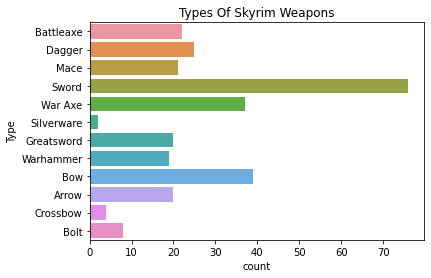

In [63]:
sns.countplot(y='Type',data=df)
mp.yticks(rotation='horizontal')
mp.title("Types Of Skyrim Weapons")
mp.show()

The **sword** is the most common weapon found throughout Skyrim.

Now, let's take a look at the most amount of ingots required for weapon upgrades.

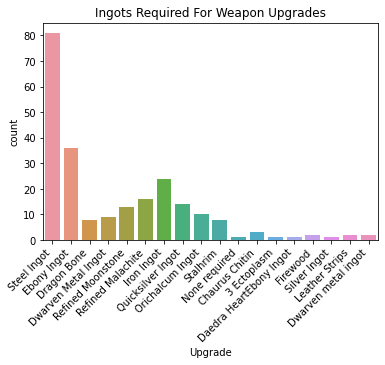

In [73]:
sns.countplot(x='Upgrade', data=df)
mp.title("Ingots Required For Weapon Upgrades")
mp.xticks(rotation=45, horizontalalignment='right')
mp.show()

Looks like a steel ingot is the most common resource.

# Summary

* The most expensive weapon in the game is Dragonbone Warhammer, which sells for 4,275 gold.
* Auriel's Bow has the highest speed throughout Skyrim.
* The steel ingot is the most common resource required for a weapon upgrade.
* The most common weapon found in Skyrim is a sword.
* There are a total of 9 Daedric one-handed and two-handed weapons max.
* The second most expensive Dragonbone weapon is the Dragonbone Battleaxe, which is about 3,000 gold.
* An arrow to the knee hurts, so be careful out there.